## Energy Data for Regression Model

### Dataset Description
The dataset for the remainder of this quiz is the Appliances Energy Prediction data. The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for 10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters. Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru), and merged together with the experimental data sets using the date and time column. Two random variables have been included in the data set for testing the regression models and to filter out non predictive attributes (parameters). The attribute information can be seen below.

Attribute Information:

Date, time year-month-day hour:minute:second

Appliances, energy use in Wh

lights, energy use of light fixtures in the house in Wh

T1, Temperature in kitchen area, in Celsius

RH_1, Humidity in kitchen area, in %

T2, Temperature in living room area, in Celsius

RH_2, Humidity in living room area, in %

T3, Temperature in laundry room area

RH_3, Humidity in laundry room area, in %

T4, Temperature in office room, in Celsius

RH_4, Humidity in office room, in %

T5, Temperature in bathroom, in Celsius

RH_5, Humidity in bathroom, in %

T6, Temperature outside the building (north side), in Celsius

RH_6, Humidity outside the building (north side), in %

T7, Temperature in ironing room , in Celsius

RH_7, Humidity in ironing room, in %

T8, Temperature in teenager room 2, in Celsius

RH_8, Humidity in teenager room 2, in %

T9, Temperature in parents room, in Celsius

RH_9, Humidity in parents room, in %

To, Temperature outside (from Chievres weather station), in Celsius

Pressure (from Chievres weather station), in mm Hg

RH_out, Humidity outside (from Chievres weather station), in %

Wind speed (from Chievres weather station), in m/s

Visibility (from Chievres weather station), in km

Tdewpoint (from Chievres weather station), Â °C

rv1, Random variable 1, nondimensional

rv2, Random variable 2, nondimensional

To answer some questions, you will need to normalize the dataset using the MinMaxScaler after removing the following columns: [“date”, “lights”]. The target variable is “Appliances”. Use a 70-30 train-test set split with a random state of 42 (for reproducibility). Run a multiple linear regression using the training set and evaluate your model on the test set.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
energydata = pd.read_csv("/Users/user/Documents/Data Science/Hamoye/Energy Data/energydata_complete.csv")
energydata.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [3]:
energydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
date           19735 non-null object
Appliances     19735 non-null int64
lights         19735 non-null int64
T1             19735 non-null float64
RH_1           19735 non-null float64
T2             19735 non-null float64
RH_2           19735 non-null float64
T3             19735 non-null float64
RH_3           19735 non-null float64
T4             19735 non-null float64
RH_4           19735 non-null float64
T5             19735 non-null float64
RH_5           19735 non-null float64
T6             19735 non-null float64
RH_6           19735 non-null float64
T7             19735 non-null float64
RH_7           19735 non-null float64
T8             19735 non-null float64
RH_8           19735 non-null float64
T9             19735 non-null float64
RH_9           19735 non-null float64
T_out          19735 non-null float64
Press_mm_hg    19735 non-null float64
RH_out         19735 n

In [4]:
energydata.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [5]:
energy_data = energydata.copy()
energy_data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [6]:
# Scale data
from sklearn.preprocessing import MinMaxScaler

In [7]:
energy_data = energy_data.drop(["date", "lights"], axis = 1)
energy_data.head()

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,60,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,60,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,50,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,50,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,60,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [8]:
scaler = MinMaxScaler()
scaler.fit(energy_data)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [9]:
energy_tran = pd.DataFrame(scaler.transform(energy_data), columns = energy_data.columns)
energy_tran.head()

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,0.046729,0.32735,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,0.764262,0.175506,...,0.223032,0.677290,0.372990,0.097674,0.894737,0.500000,0.953846,0.538462,0.265449,0.265449
1,0.046729,0.32735,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,0.782437,0.175506,...,0.226500,0.678532,0.369239,0.100000,0.894737,0.476190,0.894872,0.533937,0.372083,0.372083
2,0.037383,0.32735,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,0.778062,0.175506,...,0.219563,0.676049,0.365488,0.102326,0.894737,0.452381,0.835897,0.529412,0.572848,0.572848
3,0.037383,0.32735,0.524080,0.225345,0.678414,0.215188,0.758685,0.341441,0.770949,0.175506,...,0.219563,0.671909,0.361736,0.104651,0.894737,0.428571,0.776923,0.524887,0.908261,0.908261
4,0.046729,0.32735,0.531419,0.225345,0.676727,0.215188,0.758685,0.341441,0.762697,0.178691,...,0.219563,0.671909,0.357985,0.106977,0.894737,0.404762,0.717949,0.520362,0.201611,0.201611


In [12]:
#Set Targets and Features
energy_features = energy_tran.drop("Appliances", axis =1)
energy_target = energy_tran["Appliances"]

In [13]:
#Set Targets and Features for T2 and T6 model
energy_feat = energy_tran["T2"]
energy_targ = energy_tran["T6"]

In [14]:
energy_features.shape

(19735, 26)

In [15]:
energy_target.shape

(19735,)

In [42]:
# split Data

from sklearn.model_selection import train_test_split

In [56]:
x_train, x_test, y_train, y_test = train_test_split(energy_features, energy_target, test_size = 0.3, shuffle = True, random_state = 42)

In [44]:
x_train.shape

(13814, 26)

In [45]:
y_train.shape

(13814,)

In [46]:
x_test.shape

(5921, 26)

In [47]:
y_test.shape

(5921,)

In [63]:
x_ = np.array(x_train)
x_.reshape(-1, 1)

array([[0.49736008],
       [0.23676727],
       [0.12284953],
       ...,
       [0.49547511],
       [0.34907575],
       [0.34907575]])

In [64]:
y_ = np.array(y_train)
y_.reshape(-1, 1)

array([[0.03738318],
       [0.01869159],
       [0.02803738],
       ...,
       [0.01869159],
       [0.06542056],
       [0.11214953]])

In [65]:
x_.shape

(13814, 26)

In [66]:
y_.shape

(13814,)

In [35]:
# Run LinearRegression

from sklearn.linear_model import LinearRegression

In [48]:
reg = LinearRegression()

In [61]:
#x = x_train.values.reshape(-1,1)

In [67]:
reg.fit(x_, y_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [68]:
reg.score(x_, y_)

0.14471942308518737

In [69]:
reg.intercept_

0.15290295882253055

In [70]:
reg.coef_

array([-0.00328105,  0.5535466 , -0.23617792, -0.45669795,  0.29062714,
        0.09604827,  0.028981  ,  0.02638578, -0.01565684,  0.01600579,
        0.23642491,  0.03804865,  0.01031878, -0.04461364,  0.10199505,
       -0.15759548, -0.18994077, -0.03980032, -0.32185967,  0.00683933,
       -0.07767065,  0.02918313,  0.01230661,  0.11775773,  0.0007701 ,
        0.0007701 ])

## Let me play With Statsmodel

In [72]:
import statsmodels.api as sm

In [80]:
x = sm.add_constant(x)
results = sm.OLS(y_train, x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Appliances   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     93.32
Date:                Sun, 05 Sep 2021   Prob (F-statistic):               0.00
Time:                        09:06:25   Log-Likelihood:                 13819.
No. Observations:               13814   AIC:                        -2.759e+04
Df Residuals:                   13788   BIC:                        -2.739e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1529      0.025      6.220      0.000       0.105       0.201
x1            -0.0033      0.020     -0.165      0.869      -0.042       0.036
x2             0.5535      0.028     19.814      0.000       0.499       0.608
x3            -0.2362      0.026     -9.245      0.000      -0.286      -0.186
x4            -0.4567      0.031    -14.707      0.000      -0.518      -0.396
x5             0.2906      0.014     20.088      0.000       0.262       0.319
x6             0.0960      0.016      5.834      0.000       0.064       0.128
x7             0.0290      0.012      2.336      0.019       0.005       0.053
x8             0.0264      0.017      1.582      0.114      -0.006       0.059
x9            -0.0157      0.014     -1.126      0.260      -0.043       0.012
x10            0.0160      0.007      2.448      0.014       0.003       0.029
x11            0.2364      0.025      9.515      0.000       0.188       0.285
x12            0.0380      0.008      5.016      0.000       0.023       0.053
x13            0.0103      0.016      0.652      0.514      -0.021       0.041
x14           -0.0446      0.014     -3.260      0.001      -0.071      -0.018
x15            0.1020      0.012      8.465      0.000       0.078       0.126
x16           -0.1576      0.012    -12.935      0.000      -0.181      -0.134
x17           -0.1899      0.019    -10.053      0.000      -0.227      -0.153
x18           -0.0398      0.011     -3.559      0.000      -0.062      -0.018
x19           -0.3219      0.054     -5.946      0.000      -0.428      -0.216
x20            0.0068      0.005      1.301      0.193      -0.003       0.017
x21           -0.0777      0.027     -2.850      0.004      -0.131      -0.024
x22            0.0292      0.005      5.317      0.000       0.018       0.040
x23            0.0123      0.004      2.905      0.004       0.004       0.021
x24            0.1178      0.037      3.154      0.002       0.045       0.191
x25            0.0008      0.001      0.589      0.556      -0.002       0.003
x26            0.0008      0.001      0.589      0.556      -0.002       0.003
==============================================================================
Omnibus:                     9901.867   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           154402.632
Skew:                           3.367   Prob(JB):                         0.00
Kurtosis:                      17.930   Cond. No.                     1.09e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.33e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is 

In [81]:
#Correlateion Table
correlation = energy_data.corr()
correlation

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
Appliances,1.000000,0.055447,0.086031,0.120073,-0.060465,0.085060,0.036292,0.040281,0.016965,0.019760,...,0.010010,-0.051462,0.099155,-0.034885,-0.152282,0.087122,0.000230,0.015353,-0.011145,-0.011145
T1,0.055447,1.000000,0.164006,0.836834,-0.002509,0.892402,-0.028550,0.877001,0.097861,0.885247,...,0.844777,0.071756,0.682846,-0.150574,-0.345481,-0.087654,-0.076210,0.571309,-0.006203,-0.006203
RH_1,0.086031,0.164006,1.000000,0.269839,0.797535,0.253230,0.844677,0.106180,0.880359,0.205797,...,0.115263,0.764001,0.340767,-0.293957,0.274126,0.204932,-0.021057,0.639106,-0.000699,-0.000699
T2,0.120073,0.836834,0.269839,1.000000,-0.165610,0.735245,0.121497,0.762066,0.231563,0.720550,...,0.675535,0.157346,0.792255,-0.133028,-0.505291,0.052495,-0.069721,0.582602,-0.011087,-0.011087
RH_2,-0.060465,-0.002509,0.797535,-0.165610,1.000000,0.137319,0.678326,-0.047304,0.721435,0.110409,...,0.054544,0.676467,0.033674,-0.255646,0.584911,0.069190,-0.005368,0.499152,0.006275,0.006275
T3,0.085060,0.892402,0.253230,0.735245,0.137319,1.000000,-0.011234,0.852778,0.122737,0.888169,...,0.901324,0.134602,0.699417,-0.189974,-0.281718,-0.100776,-0.102310,0.645886,-0.005194,-0.005194
RH_3,0.036292,-0.028550,0.844677,0.121497,0.678326,-0.011234,1.000000,-0.140457,0.898978,-0.050062,...,-0.195270,0.833538,0.118207,-0.233274,0.356192,0.263188,0.017041,0.414387,-0.000477,-0.000477
T4,0.040281,0.877001,0.106180,0.762066,-0.047304,0.852778,-0.140457,1.000000,-0.048650,0.871813,...,0.889439,-0.025549,0.663478,-0.075292,-0.388602,-0.185747,-0.104768,0.519471,-0.001815,-0.001815
RH_4,0.016965,0.097861,0.880359,0.231563,0.721435,0.122737,0.898978,-0.048650,1.000000,0.091812,...,-0.044518,0.856591,0.293289,-0.250748,0.336813,0.300192,0.002636,0.616509,-0.001787,-0.001787
T5,0.019760,0.885247,0.205797,0.720550,0.110409,0.888169,-0.050062,0.871813,0.091812,1.000000,...,0.911055,0.072308,0.651321,-0.170999,-0.273953,-0.145011,-0.084164,0.588362,-0.005490,-0.005490


In [84]:
x2 = np.array(x_test)
x2.reshape(-1, 1)

array([[0.43294615],
       [0.23052931],
       [0.12066877],
       ...,
       [0.74057315],
       [0.19891132],
       [0.19891132]])

In [82]:
#x2 = x_test.values.reshape(-1,1)

In [85]:
#MAKE PREDICTION 
predicted_values = reg.predict(x2)
predicted_values

array([0.03322207, 0.24411599, 0.03400024, ..., 0.06844707, 0.10032325,
       0.05722198])

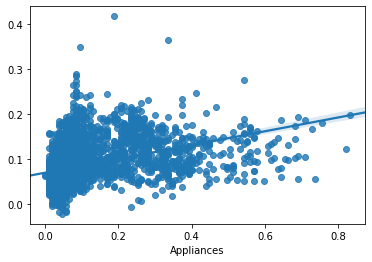

In [86]:
sns.regplot(y_test, predicted_values)

In [87]:
predict_table = pd.DataFrame(y_test)
predict_table["predicted_value"] = predicted_values 
predict_table

,Appliances,predicted_value
8980,0.028037,0.033222
2754,0.074766,0.244116
9132,0.037383,0.034000
14359,0.037383,0.105377
8875,0.056075,0.023360
...,...,...
831,0.224299,0.086607
10993,0.046729,0.075163
11761,0.037383,0.068447
12364,0.093458,0.100323


In [88]:
xx = pd.DataFrame(predict_table.reset_index(drop = True))
xx

,Appliances,predicted_value
0,0.028037,0.033222
1,0.074766,0.244116
2,0.037383,0.034000
3,0.037383,0.105377
4,0.056075,0.023360
...,...,...
5916,0.224299,0.086607
5917,0.046729,0.075163
5918,0.037383,0.068447
5919,0.093458,0.100323


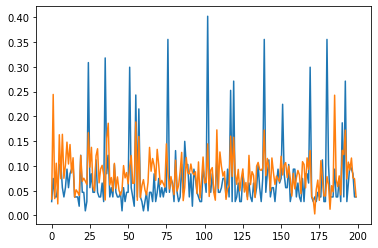

In [89]:

plt.plot(xx[:200])
plt.show()

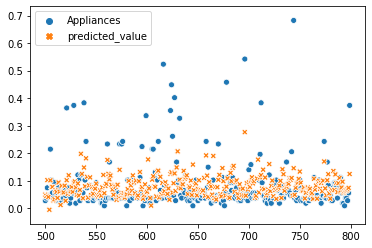

In [90]:
sns.scatterplot(data = xx.iloc[500:800])

# Evaluation Metrics

In [91]:
#Residual Sum Of Squares

import numpy as np
rss = np.sum(np.square(predict_table["Appliances"] - predict_table["predicted_value"]))
print("Residual Sum of Squares (RSS) = ",  round(rss, 3))

Residual Sum of Squares (RSS) =  45.348


In [92]:
#Root Mean Squared Error

from sklearn.metrics import  mean_squared_error
rmse = np.sqrt(mean_squared_error(predict_table["Appliances"], predict_table["predicted_value"]))
print("Root Mean Square Error (RMSE) = ",  round(rmse, 4))

Root Mean Square Error (RMSE) =  0.0875


In [93]:
# Mean Absolute Error
from sklearn import metrics

mae = metrics.mean_absolute_error(predict_table["Appliances"], predict_table["predicted_value"])
print("Mean Absolute Error (MAE) = ",  round(mae, 4))

Mean Absolute Error (MAE) =  0.0501


In [94]:
# Mean Squared Error

mse = metrics.mean_squared_error(predict_table["Appliances"], predict_table["predicted_value"])
print("Mean Squared Error (MSE) = ",  round(mse, 4))

Mean Squared Error (MSE) =  0.0077


In [95]:
# r-squared
r2 = reg.score(x_train, y_train)
print("r-squared = ",  round(r2, 3))

r-squared =  0.145


In [97]:
# feature selection and lasso regression (alpha = 0.01)

from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.01)
lasso_reg.fit(x_, y_)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [98]:
# feature selection and lasso regression  (alpha = 0.4)

from sklearn.linear_model import Lasso
lasso_reg4 = Lasso(alpha=0.4)
lasso_reg4.fit(x_, y_)

Lasso(alpha=0.4, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [99]:
# feature selection and lasso regression (alpha = 0.001)

from sklearn.linear_model import Lasso
lasso_reg001 = Lasso(alpha=0.001)
lasso_reg001.fit(x_, y_)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [100]:
# ridge regression

from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.5)
ridge_reg.fit(x_, y_)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [104]:
#comparing the effects of regularisation
def get_weights_df(model, feat, col_name):
  #this function returns the weight of every feature
  weights = pd.Series(model.coef_, feat.columns).sort_values()
  weights_df = pd.DataFrame(weights).reset_index()
  weights_df.columns = ['Features', col_name]
  weights_df[col_name].round(3)
  return weights_df

linear_model_weights = get_weights_df(reg, x_train, 'Linear_Model_Weight')
ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg4, x_train, 'Lasso_weight')

final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')
final_weights

,Features,Linear_Model_Weight,Ridge_Weight,Lasso_weight
0,RH_2,-0.456698,-0.401134,-0.0
1,T_out,-0.321860,-0.250765,0.0
2,T2,-0.236178,-0.193880,0.0
3,T9,-0.189941,-0.188584,0.0
4,RH_8,-0.157595,-0.156596,-0.0
5,RH_out,-0.077671,-0.050541,-0.0
6,RH_7,-0.044614,-0.046291,-0.0
7,RH_9,-0.039800,-0.041701,-0.0
8,T5,-0.015657,-0.020727,0.0
9,T1,-0.003281,-0.021549,0.0


## Model For `x = "T2"`, `y = "T6"`

In [145]:
#Set Targets and Features for T2 and T6 model
energy_feat = energy_tran["T2"]
energy_targ = energy_tran["T6"]

In [106]:
# split Data

from sklearn.model_selection import train_test_split

In [186]:
x_train, x_test, y_train, y_test = train_test_split(energy_feat, energy_targ, test_size = 0.3, shuffle = True, random_state = 42)

In [173]:
x_t = x_train.values.reshape(-1,1)

In [174]:
y_t = y_train.values.reshape(-1,1)

In [168]:
x_t = np.array(x_train)
x_t.reshape(-1, 1)

array([[0.12284953],
       [0.18899927],
       [0.0574267 ],
       ...,
       [0.15265326],
       [0.31504725],
       [0.27550279]])

In [169]:
y_t = np.array(y_train)
y_t.reshape(-1, 1)

array([[0.18042012],
       [0.27521467],
       [0.13190705],
       ...,
       [0.11570368],
       [0.21146849],
       [0.4935235 ]])

In [175]:
x_t.shape

(13814, 1)

In [176]:
y_t.shape

(13814, 1)

In [177]:
# Run LinearRegression

from sklearn.linear_model import LinearRegression
reg_model = LinearRegression()
reg_model.fit(x_t, y_t)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [178]:
reg_model.score(x_t, y_t)

0.6415148739809167

In [153]:
reg_model.coef_

array([[0.8910771]])

In [154]:
reg_model.intercept_

array([0.13176428])

In [180]:
x2_t = np.array(x_test)
x2_t.reshape(-1, 1)

array([[0.12066877],
       [0.37727163],
       [0.11146111],
       ...,
       [0.18899927],
       [0.33438333],
       [0.21322995]])

In [188]:
x2_t.shape

(5921, 1)

In [187]:
x2_t = x_test.values.reshape(-1,1)

In [189]:
#MAKE PREDICTION 
predicted_values = reg_model.predict(x2_t)
predicted_values

array([[0.23928945],
       [0.46794238],
       [0.23108472],
       ...,
       [0.3001772 ],
       [0.4297256 ],
       [0.3217686 ]])

In [190]:
predict_table = pd.DataFrame(y_test)
predict_table["predicted_value"] = predicted_values 
predict_table

,T6,predicted_value
8980,0.211427,0.239289
2754,0.250182,0.467942
9132,0.168777,0.231085
14359,0.501383,0.636355
8875,0.155193,0.155299
...,...,...
831,0.179450,0.461897
10993,0.428613,0.332564
11761,0.455974,0.300177
12364,0.560638,0.429726


In [192]:
xxx = pd.DataFrame(predict_table.reset_index(drop = True))
xxx

,T6,predicted_value
0,0.211427,0.239289
1,0.250182,0.467942
2,0.168777,0.231085
3,0.501383,0.636355
4,0.155193,0.155299
...,...,...
5916,0.179450,0.461897
5917,0.428613,0.332564
5918,0.455974,0.300177
5919,0.560638,0.429726


### Evaluation Metrics

In [193]:
#Residual Sum Of Squares

import numpy as np
rss = np.sum(np.square(predict_table["T6"] - predict_table["predicted_value"]))
print("Residual Sum of Squares (RSS) = ",  round(rss, 3))

Residual Sum of Squares (RSS) =  66.116


In [194]:
#Root Mean Squared Error

from sklearn.metrics import  mean_squared_error
rmse = np.sqrt(mean_squared_error(predict_table["T6"], predict_table["predicted_value"]))
print("Root Mean Square Error (RMSE) = ",  round(rmse, 4))

Root Mean Square Error (RMSE) =  0.1057


In [195]:
# Mean Absolute Error
from sklearn import metrics

mae = metrics.mean_absolute_error(predict_table["T6"], predict_table["predicted_value"])
print("Mean Absolute Error (MAE) = ",  round(mae, 4))

Mean Absolute Error (MAE) =  0.0822


In [196]:
# Mean Squared Error

mse = metrics.mean_squared_error(predict_table["T6"], predict_table["predicted_value"])
print("Mean Squared Error (MSE) = ",  round(mse, 4))

Mean Squared Error (MSE) =  0.0112


# The End!